# t-SNE Visualization

Demonstrating t-SNE on high-dimensional datasets using sklearn (from-scratch is very complex).

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits, load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import time

sns.set_style('white')
plt.rcParams['figure.figsize'] = (14, 6)
np.random.seed(42)

---
## Load Digits Dataset (64 dimensions)

In [2]:
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_digits)

print(f'Dataset shape: {X_digits.shape}')
print(f'Dimensions: {X_digits.shape[1]}')
print(f'Classes: {len(np.unique(y_digits))}')
print(f'Samples per class: ~{len(y_digits) // 10}')

Dataset shape: (1797, 64)
Dimensions: 64
Classes: 10
Samples per class: ~179


---
## PCA vs t-SNE Comparison

In [3]:
# PCA reduction to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# t-SNE reduction to 2D
tsne = TSNE(n_components=2, perplexity=30, random_state=42, max_iter=1000)
start = time.time()
X_tsne = tsne.fit_transform(X_scaled)
tsne_time = time.time() - start

print(f't-SNE computation time: {tsne_time:.2f} seconds')
print(f'PCA explained variance: {sum(pca.explained_variance_ratio_):.2%}')

t-SNE computation time: 4.70 seconds
PCA explained variance: 21.59%


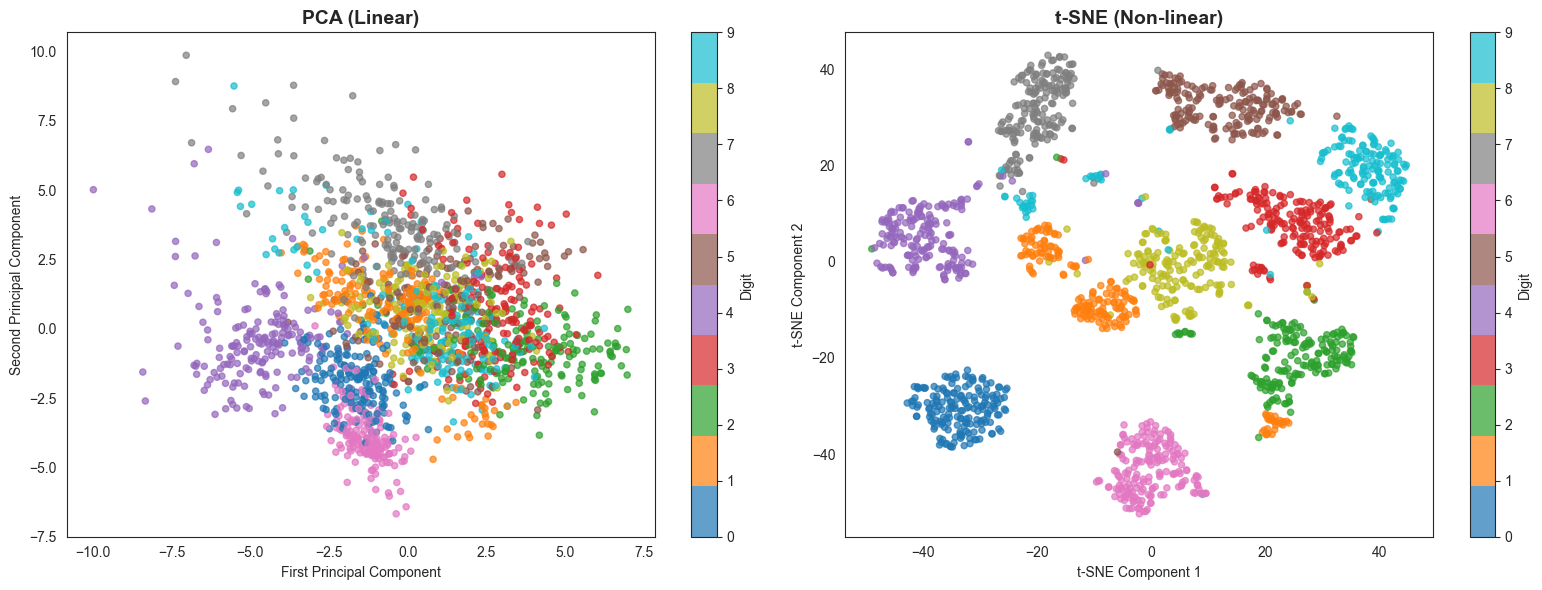

t-SNE reveals much clearer cluster structure than PCA


In [4]:
# Visualize both
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# PCA
scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y_digits, 
                          cmap='tab10', s=20, alpha=0.7)
axes[0].set_title('PCA (Linear)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('First Principal Component')
axes[0].set_ylabel('Second Principal Component')
plt.colorbar(scatter1, ax=axes[0], label='Digit')

# t-SNE
scatter2 = axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_digits,
                          cmap='tab10', s=20, alpha=0.7)
axes[1].set_title('t-SNE (Non-linear)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('t-SNE Component 1')
axes[1].set_ylabel('t-SNE Component 2')
plt.colorbar(scatter2, ax=axes[1], label='Digit')

plt.tight_layout()
plt.show()

print('t-SNE reveals much clearer cluster structure than PCA')

---
## Effect of Perplexity

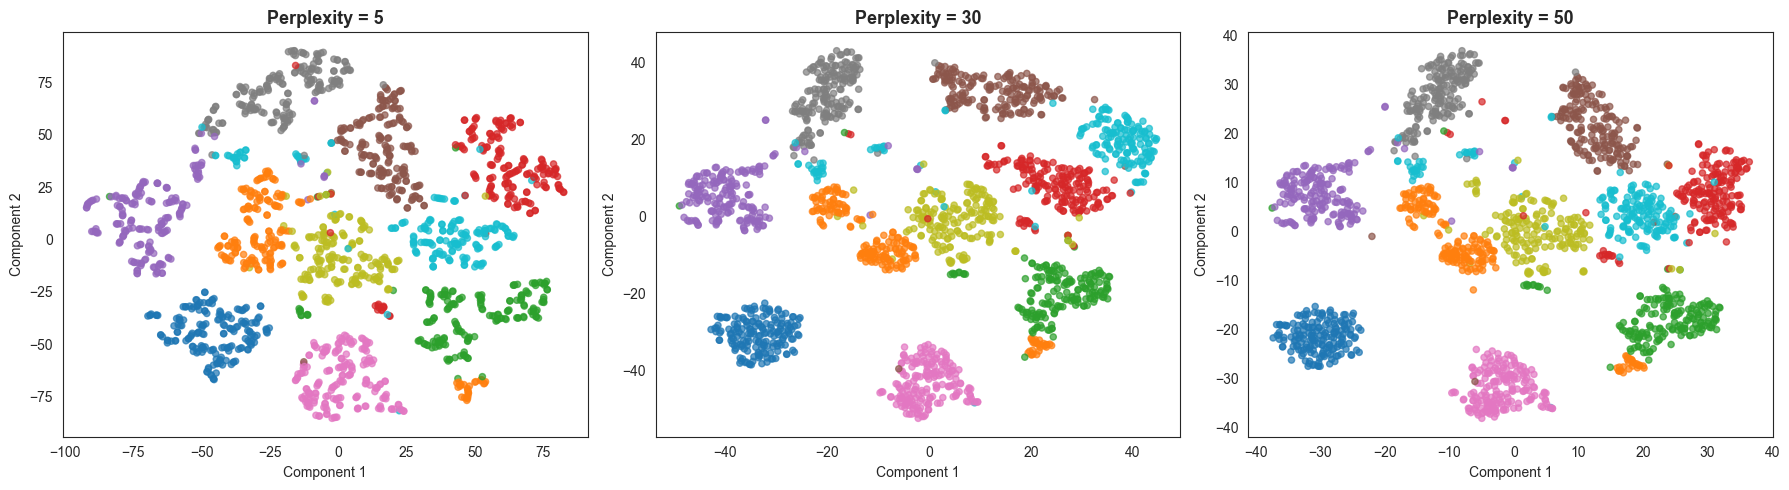

Low perplexity: Focus on local structure
High perplexity: More global view
Perplexity = 30 is good default


In [5]:
perplexities = [5, 30, 50]
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, perp in enumerate(perplexities):
    tsne_p = TSNE(n_components=2, perplexity=perp, random_state=42, max_iter=1000)
    X_tsne_p = tsne_p.fit_transform(X_scaled)
    
    scatter = axes[idx].scatter(X_tsne_p[:, 0], X_tsne_p[:, 1], c=y_digits,
                               cmap='tab10', s=20, alpha=0.7)
    axes[idx].set_title(f'Perplexity = {perp}', fontsize=13, fontweight='bold')
    axes[idx].set_xlabel('Component 1')
    axes[idx].set_ylabel('Component 2')

plt.tight_layout()
plt.show()

print('Low perplexity: Focus on local structure')
print('High perplexity: More global view')
print('Perplexity = 30 is good default')

---
## Multiple Runs (Non-determinism)

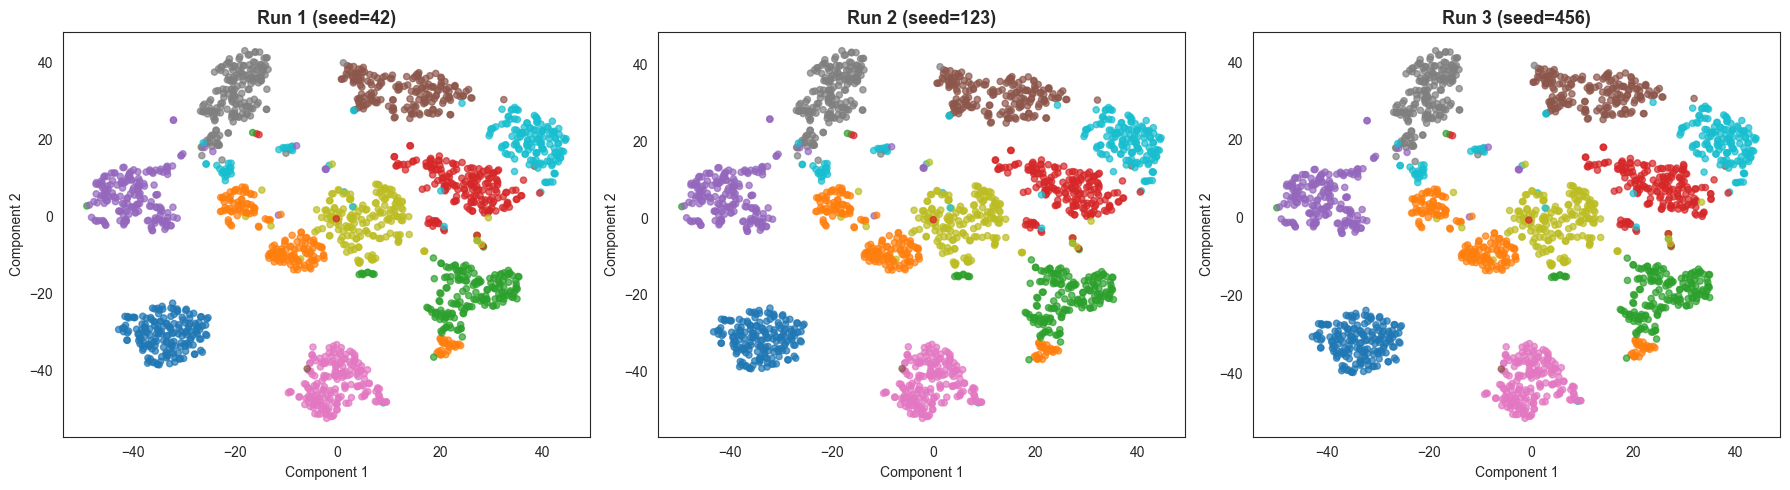

Different runs produce different embeddings
But cluster structure should be consistent


In [6]:
# Run t-SNE 3 times with different random seeds
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, seed in enumerate([42, 123, 456]):
    tsne_run = TSNE(n_components=2, perplexity=30, random_state=seed, max_iter=1000)
    X_tsne_run = tsne_run.fit_transform(X_scaled)
    
    scatter = axes[idx].scatter(X_tsne_run[:, 0], X_tsne_run[:, 1], c=y_digits,
                               cmap='tab10', s=20, alpha=0.7)
    axes[idx].set_title(f'Run {idx+1} (seed={seed})', fontsize=13, fontweight='bold')
    axes[idx].set_xlabel('Component 1')
    axes[idx].set_ylabel('Component 2')

plt.tight_layout()
plt.show()

print('Different runs produce different embeddings')
print('But cluster structure should be consistent')

---
## PCA Preprocessing

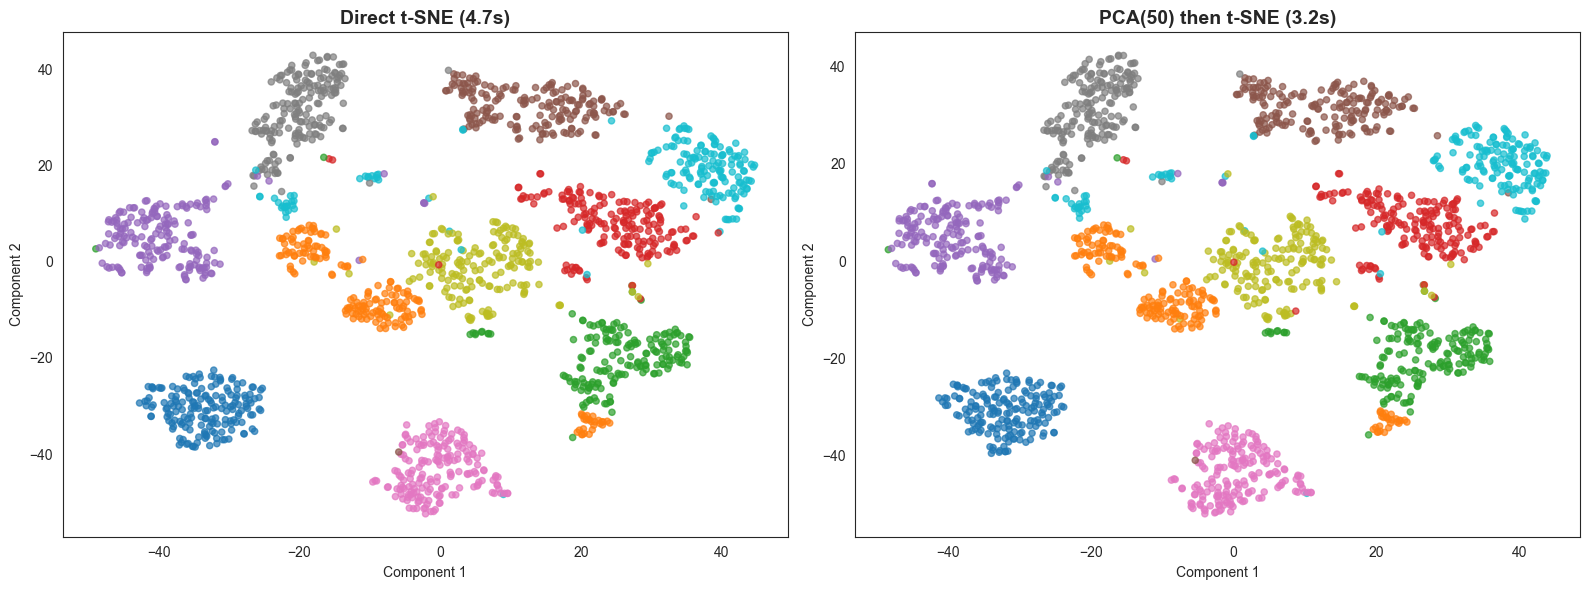

PCA preprocessing speedup: 1.5x
Quality: Similar results, but faster with PCA preprocessing


In [7]:
# Reduce to 50 dimensions with PCA first (common practice)
pca_50 = PCA(n_components=50)
X_pca_50 = pca_50.fit_transform(X_scaled)

# Then apply t-SNE
tsne_after_pca = TSNE(n_components=2, perplexity=30, random_state=42)
start = time.time()
X_tsne_pca = tsne_after_pca.fit_transform(X_pca_50)
time_with_pca = time.time() - start

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Direct t-SNE
scatter1 = axes[0].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_digits, cmap='tab10', s=20, alpha=0.7)
axes[0].set_title(f'Direct t-SNE ({tsne_time:.1f}s)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Component 1')
axes[0].set_ylabel('Component 2')

# PCA then t-SNE
scatter2 = axes[1].scatter(X_tsne_pca[:, 0], X_tsne_pca[:, 1], c=y_digits, cmap='tab10', s=20, alpha=0.7)
axes[1].set_title(f'PCA(50) then t-SNE ({time_with_pca:.1f}s)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Component 1')
axes[1].set_ylabel('Component 2')

plt.tight_layout()
plt.show()

print(f'PCA preprocessing speedup: {tsne_time/time_with_pca:.1f}x')
print('Quality: Similar results, but faster with PCA preprocessing')

---
## Summary

**Key Points:**
- t-SNE excels at visualizing high-dimensional data
- Perplexity controls local vs global structure balance
- Non-deterministic: multiple runs needed
- PCA preprocessing speeds up computation
- Only for visualization, not for dimensionality reduction

**Key Point:** "t-SNE preserves local neighborhoods in high-dimensional space when projecting to 2D/3D. Perplexity parameter balances local and global structure. Results are non-deterministic -run multiple times to verify cluster consistency."